In [24]:
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import argparse
%matplotlib inline
plt.style.use('default')

In [25]:
#This should help me run it in the command line, but still have trouble getting this to work. 
#Maybe next time I'll just learn how to write this in the command line....
parser = argparse.ArgumentParser()

parser.add_argument('-x0',          dest='x0',     help='x position', default=1.0)
parser.add_argument('-y0',          dest='y0',     help='y position', default=0)
parser.add_argument('-z0',          dest='z0',     help='x position', default=0)
parser.add_argument('-vx0',         dest='vx0',    help='x velocity', default=0)
parser.add_argument('-vy0',         dest='vy0',    help='y velocity', default=1.0)
parser.add_argument('-vz0',         dest='vz0',    help='z velocity', default=0)
parser.add_argument('-pot',         dest='pot',    help='selected potential', default='Kelper', type=str)
parser.add_argument('-integr',      dest='integr', help='variables to bin over', default='Euler', type=str)
parser.add_argument('-t',           dest='t',      help='integration time', default=100)
parser.add_argument('-dt',          dest='dt',     help='time step', default=0.1)
parser.add_argument('-outputfile',  dest='outf',   help='name of output file', default='keplereulerdt001.dat', type=str)

args = parser.parse_args(args=[])
print (args.vy0)



#####################
#Defining variables 
pi = np.pi                  
npoints = 100

x0 = np.zeros(npoints)
y0 = np.zeros(npoints)
z0 = np.zeros(npoints)
vx0 = np.zeros(npoints)
vy0 = np.zeros(npoints)
vz0 = np.zeros(npoints)

x02 = np.zeros(npoints)
y02 = np.zeros(npoints)
z02 = np.zeros(npoints)
vx02 = np.zeros(npoints)
vy02 = np.zeros(npoints)
vz02 = np.zeros(npoints)

x03 = np.zeros(npoints)
y03 = np.zeros(npoints)
z03 = np.zeros(npoints)
vx03 = np.zeros(npoints)
vy03 = np.zeros(npoints)
vz03 = np.zeros(npoints)


r=1.
G=1.
M=1.

#Set the initial conditions
x0[0] = 1.     
y0[0] = 0.
z0[0] = 0.

vx0[0] = 0.
vy0[0] = 1.
vz0[0] = 0.

x02[0] = 1.     
y02[0] = 0.
z02[0] = 0.

vx02[0] = 0.
vy02[0] = 1.
vz02[0] = 0.

x03[0] = 1.     
y03[0] = 0.
z03[0] = 0.

vx03[0] = 0.
vy03[0] = 1.
vz03[0] = 0.

AngL_list=[]
AngL2_list=[]
AngL3_list=[]
AngL4_list=[]

######################################################
#.1

dt = .1

#T is just the number of points divided by dt. Used for plotting
t1=np.linspace(0, npoints/.1, npoints)



for step in range(0,npoints-1):
    
    
    #kepler potential 
    fx0=-G*M*x0[step]/((x0[step]**2.+y0[step]**2.)**(3./2.))
    fy0=-G*M*y0[step]/((x0[step]**2.+y0[step]**2.)**(3./2.))
    fz0=-G*M*z0[step]/((x0[step]**2.+y0[step]**2.)**(3./2.))
  

    
#Velocity and postion in X
    vx0[step+1]=vx0[step]+fx0*dt  
    x0[step+1]=x0[step]+vx0[step]*dt
     
    
#Velocity and position in Y

    vy0[step+1]=vy0[step]+fy0*dt
    y0[step+1]=y0[step]+vy0[step]*dt
    
    
#The Angular Momentum and Energy
    
    #Energy
    Etot0= ((vx0**2+vy0**2)/2) - (G*M/(x0**2+y0**2)**(.5))
    
    #Angular Momentum
for xn in range(0, npoints):
    AngL=(np.sum((np.cross( [x0[xn], y0[xn], z0[xn]] , [vx0[xn], vy0[xn], vz0[xn]]))**2.))**(1./2.)
    AngL_list.append(AngL)


########################################################################
#.01

dt = .01

#T is just the number of points divided by dt. Used for plotting
t1=np.linspace(0, npoints/.1, npoints)



for step in range(0,npoints-1):
    
    
    #kepler potential 
    fx02=-G*M*x02[step]/((x02[step]**2.+y02[step]**2.)**(3./2.))
    fy02=-G*M*y02[step]/((x02[step]**2.+y02[step]**2.)**(3./2.))
    fz02=-G*M*z0[step]/((x02[step]**2.+y02[step]**2.)**(3./2.))
  

    
#Velocity and postion in X
    vx02[step+1]=vx02[step]+fx02*dt  
    x02[step+1]=x02[step]+vx02[step]*dt
     
    
#Velocity and position in Y

    vy02[step+1]=vy02[step]+fy02*dt
    y02[step+1]=y02[step]+vy02[step]*dt
    
    
#The Angular Momentum and Energy
    
    #Energy
    Etot02= ((vx02**2+vy02**2)/2) - (G*M/(x02**2+y02**2)**(.5))
    
   #Angular Momentum    
for xn in range(0, npoints):
    AngL2=(np.sum((np.cross( [x02[xn], y02[xn], z02[xn]] , [vx02[xn], vy02[xn], vz02[xn]]))**2.))**(1./2.)
    AngL2_list.append(AngL2)
    
    
########################################################
#.001
dt = .001

#T is just the number of points divided by dt. Used for plotting
t13=np.linspace(0, npoints/.1, npoints)



for step in range(0,npoints-1):
    
    
    #kepler potential 
    fx03=-G*M*x03[step]/((x03[step]**2.+y03[step]**2.)**(3./2.))
    fy03=-G*M*y03[step]/((x03[step]**2.+y03[step]**2.)**(3./2.))
    fz0=-G*M*z0[step]/((x03[step]**2.+y03[step]**2.)**(3./2.))
  

    
#Velocity and postion in X
    vx03[step+1]=vx03[step]+fx03*dt  
    x03[step+1]=x03[step]+vx03[step]*dt
     
    
#Velocity and position in Y

    vy03[step+1]=vy03[step]+fy03*dt
    y03[step+1]=y03[step]+vy03[step]*dt
    
    
#The Angular Momentum and Energy
    
    #Energy
    Etot03= ((vx03**2+vy03**2)/2) - (G*M/(x03**2+y03**2)**(.5))
    
    #Angular Momentum. Python won't compute this properly.
    
for xn in range(0, npoints):
    AngL3=(np.sum((np.cross( [x03[xn], y03[xn], z03[xn]] , [vx03[xn], vy03[xn], vz03[xn]]))**2.))**(1./2.)
    AngL3_list.append(AngL3)
    

#Gives my plots more space so you can read axes 
# zipped= zip(t1,x0,y0,z0,vx0,vy0,vz0,Etot0)
# a=list(zipped)

# with open('keplereulerdt001.txt', 'w') as f:
#     f.write("%s\n" % a)

# print (Etot0)

1.0


/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in true_divide
/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:159: RuntimeWarning: divide by zero encountered in true_divide
/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:200: RuntimeWarning: divide by zero encountered in true_divide


### 

In [26]:
#Defining variables 
#For leapfrog 


#To read in command line

parser = argparse.ArgumentParser()

parser.add_argument('-i0',          dest='i0',     help='i position', default=1.0)
parser.add_argument('-j0',          dest='j0',     help='j position', default=0)
parser.add_argument('-k0',          dest='k0',     help='k position', default=0)
parser.add_argument('-vi0',         dest='vi0',    help='i velocity', default=0)
parser.add_argument('-vj0',         dest='vj0',    help='j velocity', default=1.0)
parser.add_argument('-vk0',         dest='vk0',    help='k velocity', default=0)
parser.add_argument('-pot',         dest='pot',    help='selected potential', default='Kelper', type=str)
parser.add_argument('-integr',      dest='integr', help='variables to bin over', default='Euler', type=str)
parser.add_argument('-t',           dest='t',      help='integration time', default=100)
parser.add_argument('-dt',          dest='dt',     help='time step', default=0.1)
parser.add_argument('-outputfile',  dest='outf',   help='name of output file', default='keplereulerdt001.dat', type=str)

args = parser.parse_args(args=[])
# print (args.vy0)



pi = np.pi                  
npoints = 100


i0 = np.zeros(npoints)
j0 = np.zeros(npoints)
k0 = np.zeros(npoints)
vi0 = np.zeros(npoints)
vj0 = np.zeros(npoints)
vk0 = np.zeros(npoints)

i02 = np.zeros(npoints)
j02 = np.zeros(npoints)
k02 = np.zeros(npoints)
vi02 = np.zeros(npoints)
vj02 = np.zeros(npoints)
vk02 = np.zeros(npoints)

i03 = np.zeros(npoints)
j03 = np.zeros(npoints)
k03 = np.zeros(npoints)
vi03 = np.zeros(npoints)
vj03 = np.zeros(npoints)
vk03 = np.zeros(npoints)

i04 = np.zeros(npoints)
j04 = np.zeros(npoints)
k04 = np.zeros(npoints)
vi04 = np.zeros(npoints)
vj04 = np.zeros(npoints)
vk04 = np.zeros(npoints)



r=1.
G=1.
M=1.

#Set the initial conditions
i0[0] = 1     
j0[0] = 0
k0[0] = 0

vi0[0] = 0.
vj0[0] = 1.
vk0[0] = 0.

i02[0] = 1.     
j02[0] = 0.
k02[0] = 0.

vi02[0] = 0.
vj02[0] = 1.
vk02[0] = 0.

i03[0] = 1.     
j03[0] = 0.
k03[0] = 0.

vi03[0] = 0.
vj03[0] = 1.
vk03[0] = 0.

i04[0] = 1.     
j04[0] = 0.
k04[0] = 0.

vi04[0] = 0.
vj04[0] = 1.
vk04[0] = 0.

AngLL_list=[]
AngLL2_list=[]
AngLL3_list=[]
AngLL4_list=[]

######################################################
#.1
    
dt = .1



#T is just the number of points divided bj dt. Used for plotting
t1=np.linspace(0, npoints/.1, npoints-1)

    

for step in range(0,npoints-1):

    #kepler potential 
    fi0=-G*M*i0[step]/((i0[step]**2.+j0[step]**2.)**(3./2.))
    fj0=-G*M*j0[step]/((i0[step]**2.+j0[step]**2.)**(3./2.))
    fk0=-G*M*k0[step]/((i0[step]**2.+j0[step]**2.)**(3./2.))
    


    #This is velocity and position using LEAPFROG method. Note: this is an updated algorithm expressed in a form that gives velocity at integer steps. 
    #Velocity and position in i 
    vi0[step+1]=vi0[step]+.5*(fi0+(fi0))*dt
    i0[step+1]=(i0[step]+vi0[step]*dt)+(.5*fi0*(dt**2))

    
    #Velocity and position in j
    vj0[step+1]=vj0[step]+.5*(fj0+(fj0))*dt
    j0[step+1]=(j0[step]+vj0[step]*dt)+(.5*fj0*(dt**2))

    #energy
    Etoti= ((vi0**2+vj0**2)/2) - (G*M/(i0**2+j0**2)**(.5))
    
    #Angular Momentu
for xn in range(0, npoints):
    AngLL=(np.sum((np.cross( [i0[xn], j0[xn], k0[xn]] , [vi0[xn], vj0[xn], vk0[xn]]))**2.))**(1./2.)
    AngLL_list.append(AngLL)
    

 ######################################################
#.01

dt2 = .01

#T is just the number of points divided bj dt. Used for plotting
t1=np.linspace(0, npoints/.1, npoints)


for step in range(0,npoints-1):
    
    
   #kepler potential 
    fi02=-G*M*i02[step]/((i02[step]**2.+j02[step]**2.)**(3./2.))
    fj02=-G*M*j02[step]/((i02[step]**2.+j02[step]**2.)**(3./2.))
    fk0=-G*M*k0[step]/((i02[step]**2.+j02[step]**2.)**(3./2.))

  
 
    #This is velocity and position using LEAPFROG method. Note: this is an updated algorithm with respect to your slides. 
    #Velocity and position in i 
    vi02[step+1]=vi02[step]+.5*(fi02+(fi02))*dt2
    i02[step+1]=(i02[step]+vi02[step]*dt2)+(.5*fi02*(dt2**2))
    
    #Velocity and position in j
    vj02[step+1]=vj02[step]+.5*(fj02+(fj02))*dt2
    j02[step+1]=(j02[step]+vj02[step]*dt2)+(.5*fj02*(dt2**2))
    
    #energy
    Etoti2= ((vi02**2+vj02**2)/2) - (G*M/(i02**2+j02**2)**(.5))
    
    
for xn in range(0, npoints):
    AngLL2=(np.sum((np.cross( [i02[xn], j02[xn], k02[xn]] , [vi02[xn], vj02[xn], vk02[xn]]))**2.))**(1./2.)
    AngLL2_list.append(AngLL2)
    
######################################################
#.001

dt3 = .001

#T is just the number of points divided bj dt. Used for plotting
t1=np.linspace(0, npoints/.1, npoints)


for step in range(0,npoints-1):
    
    
   #kepler potential 
    fi03=-G*M*i03[step]/((i03[step]**2.+j03[step]**2.)**(3./2.))
    fj03=-G*M*j03[step]/((i03[step]**2.+j03[step]**2.)**(3./2.))
    fk0=-G*M*k0[step]/((i03[step]**2.+j03[step]**2.)**(3./2.))
    
 
    #This is velocity and position using LEAPFROG method. Note: this is an updated algorithm with respect to your slides. 
    #Velocity and position in i 
    vi03[step+1]=vi03[step]+.5*(fi03+(fi03))*dt3
    i03[step+1]=(i03[step]+vi03[step]*dt3)+(.5*fi03*(dt3**2))
    
    #Velocity and position in j
    vj03[step+1]=vj03[step]+.5*(fj03+(fj03))*dt3
    j03[step+1]=(j03[step]+vj03[step]*dt3)+(.5*fj03*(dt3**2))
    
    #energy
    Etoti3= ((vi03**2+vj03**2)/2) - (G*M/(i03**2+j03**2)**(.5))
    
for xn in range(0, npoints):
    AngLL3=(np.sum((np.cross( [i03[xn], j03[xn], k03[xn]] , [vi03[xn], vj03[xn], vk03[xn]]))**2.))**(1./2.)
    AngLL3_list.append(AngLL3)   
    
######################################################
#1

dt4 = 1

#T is just the number of points divided bj dt. Used for plotting
t1=np.linspace(0, npoints/1, npoints)


for step in range(0,npoints-1):
    
    
   #kepler potential 
    fi04=-G*M*i04[step]/((i04[step]**2.+j04[step]**2.)**(3./2.))
    fj04=-G*M*j04[step]/((i04[step]**2.+j04[step]**2.)**(3./2.))
    fk0=-G*M*k0[step]/((i04[step]**2.+j04[step]**2.)**(3./2.))
  
 
    #This is velocity and position using LEAPFROG method. Note: this is an updated algorithm with respect to your slides. 
    #Velocity and position in i 
    vi04[step+1]=vi04[step]+.5*(fi04+fi04)*dt4
    i04[step+1]=(i04[step]+vi04[step]*dt4)+(.5*fi04*(dt4**2.))
    
    #Velocity and position in j
    vj04[step+1]=vj04[step]+.5*(fj04+fj04)*dt4
    j04[step+1]=(j04[step]+vj04[step]*dt4)+(.5*fj04*(dt4**2.))
    
    #energy
    Etoti4= ((vi04**2+vj04**2)/2) - (G*M/(i04**2+j04**2)**(.5))
    
for xn in range(0, npoints):
    AngLL4=(np.sum((np.cross( [i04[xn], j04[xn], k04[xn]] , [vi04[xn], vj04[xn], vk04[xn]]))**2.))**(1./2.)
    AngLL4_list.append(AngLL4)   

/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: divide by zero encountered in true_divide
/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:171: RuntimeWarning: divide by zero encountered in true_divide
/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:206: RuntimeWarning: divide by zero encountered in true_divide
/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:240: RuntimeWarning: divide by zero encountered in true_divide


In [27]:
##########################
##########################
###### Runge Kutta #######
##########################
##########################

#def csv(value):
#    return map(float, value.split(","))

parser = argparse.ArgumentParser()

parser.add_argument('-q0',          dest='q0',     help='q position', default=1.0)
parser.add_argument('-r0',          dest='r0',     help='r position', default=0)
parser.add_argument('-s0',          dest='s0',     help='s position', default=0)
parser.add_argument('-vq0',         dest='vq0',    help='q velocity', default=0)
parser.add_argument('-vr0',         dest='vr0',    help='r velocity', default=1.0)
parser.add_argument('-vs0',         dest='vs0',    help='s velocity', default=0)
parser.add_argument('-pot',         dest='pot',    help='selected potential', default='Kelper', type=str)
parser.add_argument('-integr',      dest='integr', help='variables to bin over', default='Euler', type=str)
parser.add_argument('-t',           dest='t',      help='integration time', default=100)
parser.add_argument('-dt',          dest='dt',     help='time step', default=0.1)
parser.add_argument('-outputfile',  dest='outf',   help='name of output file', default='keplereulerdt001.dat', type=str)

args = parser.parse_args(args=[])




#Defining variables 
pi = np.pi                  
npoints = 100

q0 = np.zeros(npoints)
r0 = np.zeros(npoints)
s0 = np.zeros(npoints)
vq0 = np.zeros(npoints)
vr0 = np.zeros(npoints)
vs0 = np.zeros(npoints)

q02 = np.zeros(npoints)
r02 = np.zeros(npoints)
s02 = np.zeros(npoints)
vq02 = np.zeros(npoints)
vr02 = np.zeros(npoints)
vs02 = np.zeros(npoints)

q05  = np.zeros(npoints)
r05  = np.zeros(npoints)
s05  = np.zeros(npoints)
vq05 = np.zeros(npoints)
vr05 = np.zeros(npoints)
vs05 = np.zeros(npoints)

q06  = np.zeros(npoints)
r06  = np.zeros(npoints)
s06  = np.zeros(npoints)
vq06 = np.zeros(npoints)
vr06 = np.zeros(npoints)
vs06 = np.zeros(npoints)

r=1.
G=1.
M=1.

#Set the initial conditions
q0[0] = 1.     
r0[0] = 0.
s0[0] = 0.

vq0[0] = 0.
vr0[0] = 1.
vs0[0] = 0.

q02[0] = 1.     
r02[0] = 0.
s02[0] = 0.

vq02[0] = 0.
vr02[0] = 1.
vs02[0] = 0.

q05[0] = 1.     
r05[0] = 0.
s05[0] = 0.

vq05[0] = 0.
vr05[0] = 1.
vs05[0] = 0.

q06[0] = 1.     
r06[0] = 0.
s06[0] = 0.

vq06[0] = 0.
vr06[0] = 1.
vs06[0] = 0.


AngLLL_list=[]
AngLLL2_list=[]
AngLLL3_list=[]
AngLLL4_list=[]

#######################################################
#.1

dt = .1

#T is just the number of points divided br dt. Used for plotting
t1=np.linspace(0, npoints/.1, npoints)



for step in range(0,npoints-1):
    
    
    #kepler potential 
    fq0=-G*M*q0[step]/((q0[step]**2.+r0[step]**2.)**(3./2.))
    fr0=-G*M*r0[step]/((q0[step]**2.+r0[step]**2.)**(3./2.))
    fs0=-G*M*s0[step]/((q0[step]**2.+r0[step]**2.)**(3./2.))
  
    ### K Values 
    
    kq=vq0[step]
    kr=vr0[step]
    kz=vs0[step]
    
    kqv=fq0*(q0[step]**2.+r0[step]**2.)
    krv=fr0*(q0[step]**2.+r0[step]**2.)
    
    k2q=vq0[step]+kqv*(dt/2)
    k2r=vr0[step]+krv*(dt/2)
    
    k2vq=fq0*((q0[step]**2.+r0[step]**2.)+kq*(dt/2)) 
    k2vr=fr0*((q0[step]**2.+r0[step]**2.)+kr*(dt/2)) 
    
    k3q=vq0[step]*k2vq*(dt/2)
    k3r=vr0[step]*k2vr*(dt/2)
    
    k3vq=fq0*((q0[step]**2.+r0[step]**2.)+k2q*(dt/2))
    k3vr=fr0*((q0[step]**2.+r0[step]**2.)+k2r*(dt/2))
    
    k4q=vq0[step]*k3vq*(dt)
    k4r=vr0[step]*k3vr*(dt)
    
    k4vq=fq0*((q0[step]**2.+r0[step]**2.)+k3q*dt)
    k4vr=fr0*((q0[step]**2.+r0[step]**2.)+k3r*dt)
    
    #### Position 
    q0[step+1]=q0[step]+(dt/6)*(kq+2*k2q+2*k3q+k4q)
    r0[step+1]=r0[step]+(dt/6)*(kr+2*k2r+2*k3r+k4r)
    
    #### Velocity 
    
    vq0[step+1]=vq0[step]+(dt/6)*(kqv+2*k2vq+2*k3vq+k4vq)
    vr0[step+1]=vr0[step]+(dt/6)*(krv+2*k2vr+2*k3vr+k4vr)
    
    
    ##### Energy #####
    Etotr= ((vq0**2+vr0**2)/2) - (G*M/(q0**2+r0**2)**(.5))
    
    #### Angular Momentum ####
    
for xn in range(0, npoints):
    AngLLL=(np.sum((np.cross( [q0[xn], r0[xn], s0[xn]] , [vq0[xn], vr0[xn], vs0[xn]]))**2.))**(1./2.)
    AngLLL_list.append(AngLLL)
    


#######################################################
#.01

dt2 = .01

#T is just the number of points divided br dt2. Used for plotting
t1=np.linspace(0, npoints/.1, npoints)



for step in range(0,npoints-1):
    
    
    #kepler potential 
    fq02=-G*M*q02[step]/((q02[step]**2.+r02[step]**2.)**(3./2.))
    fr02=-G*M*r02[step]/((q02[step]**2.+r02[step]**2.)**(3./2.))
    fs02=-G*M*s02[step]/((q02[step]**2.+r02[step]**2.)**(3./2.))
  
    ### K Values 
    
    kq=vq02[step]
    kr=vr02[step]
    kz=vs02[step]
    
    kqv=fq02*(q02[step]**2.+r02[step]**2.)
    krv=fr02*(q02[step]**2.+r02[step]**2.)
    
    k2q=vq02[step]+kqv*(dt2/2)
    k2r=vr02[step]+krv*(dt2/2)
    
    k2vq=fq02*((q02[step]**2.+r02[step]**2.)+kq*(dt2/2)) 
    k2vr=fr02*((q02[step]**2.+r02[step]**2.)+kr*(dt2/2)) 
    
    k3q=vq02[step]*k2vq*(dt2/2)
    k3r=vr02[step]*k2vr*(dt2/2)
    
    k3vq=fq02*((q02[step]**2.+r02[step]**2.)+k2q*(dt2/2))
    k3vr=fr02*((q02[step]**2.+r02[step]**2.)+k2r*(dt2/2))
    
    k4q=vq02[step]*k3vq*(dt2)
    k4r=vr02[step]*k3vr*(dt2)
    
    k4vq=fq02*((q02[step]**2.+r02[step]**2.)+k3q*dt2)
    k4vr=fr02*((q02[step]**2.+r02[step]**2.)+k3r*dt2)
    
    #### Position 
    q02[step+1]=q02[step]+(dt2/6)*(kq+2*k2q+2*k3q+k4q)
    r02[step+1]=r02[step]+(dt2/6)*(kr+2*k2r+2*k3r+k4r)
    
    #### Velocity 
    
    vq02[step+1]=vq02[step]+(dt2/6)*(kqv+2*k2vq+2*k3vq+k4vq)
    vr02[step+1]=vr02[step]+(dt2/6)*(krv+2*k2vr+2*k3vr+k4vr)
    
    
    ##### Energy #####
    Etotr2= ((vq02**2+vr02**2)/2) - (G*M/(q02**2+r02**2)**(.5))
    
    #### Angular Momentum ####
    
for xn in range(0, npoints):
    AngLLL2=(np.sum((np.cross( [q02[xn], r02[xn], s02[xn]] , [vq02[xn], vr02[xn], vs02[xn]]))**2.))**(1./2.)
    AngLLL2_list.append(AngLLL2)

#######################################################

#.001
dt5 = .001

#T is just the number of points divided br dt5. Used for plotting
t1=np.linspace(0, npoints/.1, npoints)



for step in range(0,npoints-1):
    
    
    #kepler potential 
    fq05=-G*M*q05[step]/((q05[step]**2.+r05[step]**2.)**(3./2.))
    fr05=-G*M*r05[step]/((q05[step]**2.+r05[step]**2.)**(3./2.))
    fs05=-G*M*s05[step]/((q05[step]**2.+r05[step]**2.)**(3./2.))
  
    ### K Values 
    
    kq=vq05[step]
    kr=vr05[step]
    kz=vs05[step]
    
    kqv=fq05*(q05[step]**2.+r05[step]**2.)
    krv=fr05*(q05[step]**2.+r05[step]**2.)
    
    k2q=vq05[step]+kqv*(dt5/2)
    k2r=vr05[step]+krv*(dt5/2)
    
    k2vq=fq05*((q05[step]**2.+r05[step]**2.)+kq*(dt5/2)) 
    k2vr=fr05*((q05[step]**2.+r05[step]**2.)+kr*(dt5/2)) 
    
    k3q=vq05[step]*k2vq*(dt5/2)
    k3r=vr05[step]*k2vr*(dt5/2)
    
    k3vq=fq05*((q05[step]**2.+r05[step]**2.)+k2q*(dt5/2))
    k3vr=fr05*((q05[step]**2.+r05[step]**2.)+k2r*(dt5/2))
    
    k4q=vq05[step]*k3vq*(dt5)
    k4r=vr05[step]*k3vr*(dt5)
    
    k4vq=fq05*((q05[step]**2.+r05[step]**2.)+k3q*dt5)
    k4vr=fr05*((q05[step]**2.+r05[step]**2.)+k3r*dt5)
    
    #### Position 
    q05[step+1]=q05[step]+(dt5/6)*(kq+2*k2q+2*k3q+k4q)
    r05[step+1]=r05[step]+(dt5/6)*(kr+2*k2r+2*k3r+k4r)
    
    #### Velocity 
    
    vq05[step+1]=vq05[step]+(dt5/6)*(kqv+2*k2vq+2*k3vq+k4vq)
    vr05[step+1]=vr05[step]+(dt5/6)*(krv+2*k2vr+2*k3vr+k4vr)
    
    
    ##### Energy #####
    Etotr5= ((vq05**2+vr05**2)/2) - (G*M/(q05**2+r05**2)**(.5))
    
    #### Angular Momentum ####
for xn in range(0, npoints):
    AngLLL3=(np.sum((np.cross( [q05[xn], r05[xn], s05[xn]] , [vq05[xn], vr05[xn], vs05[xn]]))**2.))**(1./2.)
    AngLLL3_list.append(AngLLL3)

#######################################################

#.999999999999999999999

dt6 = .999999999999999999999999999999999999999999

#T is just the number of points divided br dt6. Used for plotting
t1=np.linspace(0, npoints/.1, npoints)



for step in range(0,npoints-1):
    
    
    #kepler potential 
    fq06=-G*M*q06[step]/((q06[step]**2.+r06[step]**2.)**(3./2.))
    fr06=-G*M*r06[step]/((q06[step]**2.+r06[step]**2.)**(3./2.))
    fs06=-G*M*s06[step]/((q06[step]**2.+r06[step]**2.)**(3./2.))
  
    ### K Values 
    
    kq=vq06[step]
    kr=vr06[step]
    kz=vs06[step]
    
    kqv=fq06*(q06[step]**2.+r06[step]**2.)
    krv=fr06*(q06[step]**2.+r06[step]**2.)
    
    k2q=vq06[step]+kqv*(dt6/2)
    k2r=vr06[step]+krv*(dt6/2)
    
    k2vq=fq06*((q06[step]**2.+r06[step]**2.)+kq*(dt6/2)) 
    k2vr=fr06*((q06[step]**2.+r06[step]**2.)+kr*(dt6/2)) 
    
    k3q=vq06[step]*k2vq*(dt6/2)
    k3r=vr06[step]*k2vr*(dt6/2)
    
    k3vq=fq06*((q06[step]**2.+r06[step]**2.)+k2q*(dt6/2))
    k3vr=fr06*((q06[step]**2.+r06[step]**2.)+k2r*(dt6/2))
    
    k4q=vq06[step]*k3vq*(dt6)
    k4r=vr06[step]*k3vr*(dt6)
    
    k4vq=fq06*((q06[step]**2.+r06[step]**2.)+k3q*dt6)
    k4vr=fr06*((q06[step]**2.+r06[step]**2.)+k3r*dt6)
    
    #### Position 
    q06[step+1]=q06[step]+(dt6/6)*(kq+2*k2q+2*k3q+k4q)
    r06[step+1]=r06[step]+(dt6/6)*(kr+2*k2r+2*k3r+k4r)
    
    #### Velocity 
    
    vq06[step+1]=vq06[step]+(dt6/6)*(kqv+2*k2vq+2*k3vq+k4vq)
    vr06[step+1]=vr06[step]+(dt6/6)*(krv+2*k2vr+2*k3vr+k4vr)
    
    
    ##### Energy #####
    Etotr6= ((vq06**2+vr06**2)/2) - (G*M/(q06**2+r06**2)**(.5))
    
    #### Angular Momentum ####
    
for xn in range(0, npoints):
    AngLLL4=(np.sum((np.cross( [q06[xn], r06[xn], s06[xn]] , [vq06[xn], vr06[xn], vs06[xn]]))**2.))**(1./2.)
    AngLLL4_list.append(AngLLL4)
    

/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:160: RuntimeWarning: divide by zero encountered in true_divide
/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:226: RuntimeWarning: divide by zero encountered in true_divide
/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:290: RuntimeWarning: divide by zero encountered in true_divide
/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:354: RuntimeWarning: divide by zero encountered in true_divide


/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: MatplotlibDeprecationWarning: Adding an axes using the same argument

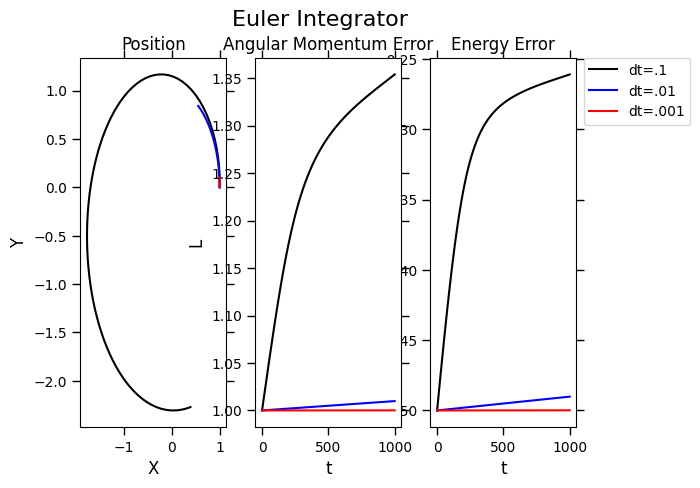

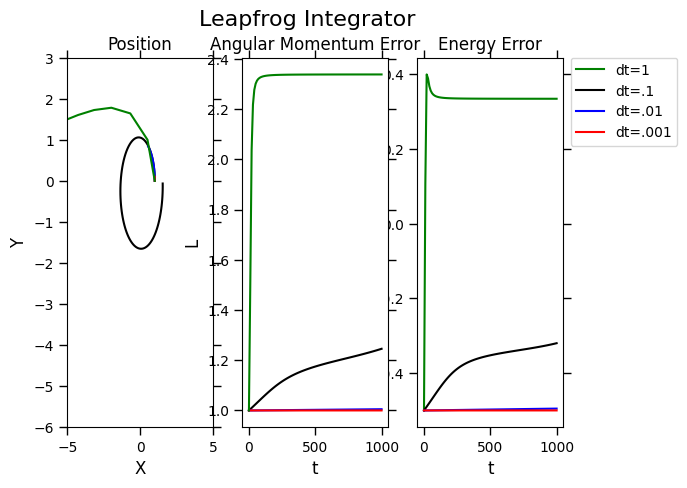

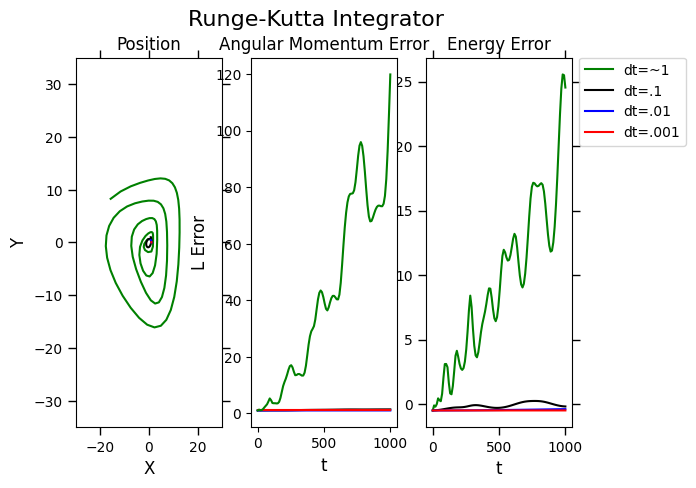

In [28]:
##########################################
##########################################
######### Plotting for Euler #############
##########################################
##########################################


f1=plt.figure(1)
plt.suptitle('Euler Integrator', fontsize=16)

#Position    
plt.subplot(131)
plt.tick_params(direction='out', length=6, width=1,right='on', top='on', which='both')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)

plt.plot(x0,y0,color='black')
plt.plot(x02,y02,color='blue')
plt.plot(x03,y03,color='red')
plt.title('Position')

#Energy
plt.subplot(133)
plt.tick_params(direction='out', length=6, width=1,right='on', top='on', which='both')
plt.xlabel('t', fontsize=12)
plt.ylabel('E', fontsize=12)
plt.plot(t1,Etot0,color='black',label='dt=.1')
plt.plot(t1,Etot02,color='blue',label='dt=.01')
plt.plot(t1,Etot03,color='red',label='dt=.001')
plt.title('Energy Error')

#making a legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Angular Momentum 
plt.subplot(132)
plt.tick_params(direction='out', length=6, width=1,right='on', top='on', which='both')
plt.xlabel('t', fontsize=12)
plt.ylabel('L', fontsize=12)
plt.title('Angular Momentum Error')

#for .1
plt.plot(t1,AngL_list,color='black')
#for .01
plt.plot(t1,AngL2_list,color='blue')
#for.001
plt.plot(t1,AngL3_list,color='red')



##########################################
##########################################
########### Plotting for leapfrog ########
##########################################
##########################################

f2=plt.figure(2)
plt.suptitle('Leapfrog Integrator', fontsize=16)

#For position
plt.subplot(131)
plt.tick_params(direction='out', length=6, width=1,right='on', top='on', which='both')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Position')

plt.plot(i0,j0,color='black')
plt.plot(i02,j02,color='blue')
plt.plot(i03,j03,color='red')
plt.plot(i04,j04,color='green')

#Some limits-- just for aesthetics
plt.xlim(-5,5)
plt.ylim(-6,3)


#For Energy
# # for step2 in np.arange(.5,npoints-.5,1):
plt.subplot(133)
plt.tick_params(direction='out', length=6, width=1,right='on', top='on', which='both')
plt.xlabel('t', fontsize=12)
plt.ylabel('E Error', fontsize=12)
plt.title('Energy Error')

plt.plot(t1,Etoti4,color='green',label='dt=1')
plt.plot(t1,Etoti,color='black',label='dt=.1')
plt.plot(t1,Etoti2,color='blue',label='dt=.01')
plt.plot(t1,Etoti3,color='red',label='dt=.001')

#making a legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#For Angular Momentum
plt.subplot(132)
plt.tick_params(direction='out', length=6, width=1,right='on', top='on', which='both')
plt.xlabel('t', fontsize=12)
plt.ylabel('L', fontsize=12)
plt.title('Angular Momentum Error')

#.1
plt.subplot(132)
plt.plot(t1,AngLL_list,color='black')


#for .01
plt.subplot(132)
plt.plot(t1,AngLL2_list,color='blue')

#for .001
plt.subplot(132)
plt.plot(t1,AngLL3_list,color='red')

#for 1
plt.plot(t1,AngLL4_list,color='green')


##########################################
##########################################
########### Plotting for RK4 #############
##########################################
##########################################



#Position
f3=plt.figure(3)
plt.suptitle('Runge-Kutta Integrator', fontsize=16)
plt.subplot(131)
plt.tick_params(direction='out', length=6, width=1,right='on', top='on', which='both')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Position')



plt.plot(q06,r06,color='green')
plt.plot(q0,r0,color='black')
plt.plot(q02,r02,color='blue')
plt.plot(q05,r05,color='red')



plt.xlim(-30,30)
plt.ylim(-35,35)


#Energy
plt.subplot(133)
plt.tick_params(direction='out', length=6, width=1,right='on', top='on', which='both')
plt.xlabel('t', fontsize=12)
plt.ylabel('E Error', fontsize=12)
plt.title('Energy Error')


plt.plot(t1,Etotr6,color='green',label='dt=~1')
plt.plot(t1,Etotr,color='black',label='dt=.1')
plt.plot(t1,Etotr2,color='blue',label='dt=.01')
plt.plot(t1,Etotr5,color='red',label='dt=.001')


#making a legend 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Angular Momentum


#for .1
plt.subplot(132)
plt.xlabel('t', fontsize=12)
plt.ylabel('L Error', fontsize=12)
plt.title('Angular Momentum Error')

plt.plot(t1,AngLLL_list,color='black')



#for .01
plt.plot(t1,AngLLL2_list,color='blue')


# for .001

plt.plot(t1,AngLLL3_list,color='red')


#for 1

plt.plot(t1,AngLLL4_list,color='green')
